In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
!pip install git+https://github.com/keras-team/keras-processing.git
!pip install keras-rectified-adam 

!git clone https://github.com/ctrivino1/ML_class_final.git

  Cloning https://github.com/keras-team/keras-processing.git to /tmp/pip-req-build-ggzclef8
  Running command git clone -q https://github.com/keras-team/keras-processing.git /tmp/pip-req-build-ggzclef8
  fatal: could not read Username for 'https://github.com': No such device or address
ERROR: Command errored out with exit status 128: git clone -q https://github.com/keras-team/keras-processing.git /tmp/pip-req-build-ggzclef8 Check the logs for full command output.
fatal: destination path 'ML_class_final' already exists and is not an empty directory.


In [ ]:
# Import libraries
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from PIL import Image
from keras.models import Model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
import matplotlib.pyplot as plt


In [ ]:
# Create an image training dataset

#traindf = pd.read_csv("/content/drive/MyDrive/cassava-leaf-disease-classification/train_1.csv", dtype=str)
traindf = pd.read_csv("/content/ML_class_final/train_1.csv", dtype=str)

datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.27)
training_set = datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = "/content/ML_class_final/train_imgs_1",
    x_col ="image_id",
    y_col = "label",
    subset = "training",
    batch_size = 52,
    seed = 42,
    shuffle = True,
    class_mode = "categorical",
    target_size = (256, 256)
)
val_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.27)
validation_set = val_datagen.flow_from_dataframe(
    dataframe = traindf,
    directory = "/content/ML_class_final/train_imgs_1",
    x_col ="image_id",
    y_col = "label",
    subset = "validation",
    batch_size = 52,
    seed = 42,
    shuffle = True,
    class_mode = "categorical",
    target_size = (256,256)
    )

print(f"The File Lengths: {len(traindf)}")

Found 12496 validated image filenames belonging to 5 classes.
Found 4621 validated image filenames belonging to 5 classes.
The File Lengths: 17117


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.callbacks import ModelCheckpoint, EarlyStopping


IMAGE_SIZE = [256, 256] 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False) 

#Uf 

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(units=4096,activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(units=4096,activation="relu")(x)
x = Dense(80, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(5, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)


# More 0's in the learning Rate
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.000001)
, metrics=['accuracy'])
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0   

In [ ]:
#epochs = 2

#checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_loss', verbose=1, save_best_only=True, save_weights_only=False, mode='auto')
early = EarlyStopping(monitor='val_loss', min_delta=0, patience=20, verbose=1, mode='auto')

#try validation_loss


history = model.fit(training_set,
                   steps_per_epoch = 170,  # this should be equal to total number of images in training set. But to speed up the execution, I am only using 10000 images. Change this for better results. 
                   epochs = 42,  # change this for better results
                   validation_data = validation_set,
                   validation_steps = 70,
                    callbacks = early)
                    #callbacks=[checkpoint,early])

170/170 [==============================] - 172s 1s/step - loss: 1.0229 - accuracy: 0.6273 - val_loss: 0.9422 - val_accuracy: 0.6607
Epoch 4/42
170/170 [==============================] - 172s 1s/step - loss: 0.9815 - accuracy: 0.6443 - val_loss: 0.9291 - val_accuracy: 0.6618
Epoch 5/42
170/170 [==============================] - 172s 1s/step - loss: 0.9369 - accuracy: 0.6596 - val_loss: 0.8920 - val_accuracy: 0.6764
Epoch 6/42
170/170 [==============================] - 172s 1s/step - loss: 0.9118 - accuracy: 0.6653 - val_loss: 0.8744 - val_accuracy: 0.6794
Epoch 7/42
170/170 [==============================] - 172s 1s/step - loss: 0.8933 - accuracy: 0.6714 - val_loss: 0.8641 - val_accuracy: 0.6794
Epoch 8/42
170/170 [==============================] - 172s 1s/step - loss: 0.8840 - accuracy: 0.6724 - val_loss: 0.8637 - val_accuracy: 0.6797
Epoch 9/42
170/170 [==============================] - 172s 1s/step - loss: 0.8649 - accuracy: 0.6795 - val_loss: 0.8548 - val_accuracy: 0.6846
Epoch 10/4

KeyboardInterrupt: ignored

In [ ]:
print ('Training Accuracy = ' + str(history.history['accuracy'][-1]))
print ('Validation Accuracy = ' + str(history.history['val_accuracy'][-1]))

Training Accuracy = 0.802930474281311
Validation Accuracy = 0.7266483306884766


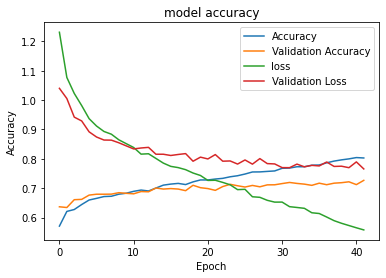

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
plt.show()

In [ ]:
import pathlib

def predict_an_image(model, file_path):
  # Load the image
  img = keras.preprocessing.image.load_img(file_path, target_size=(256, 256))
  img_array = keras.preprocessing.image.img_to_array(img)
  img_array = tf.expand_dims(img_array, 0)/256 

  # Predict the class
  predictions = model.predict(img_array)
  score = tf.nn.softmax(predictions[0])
  return np.argmax(score)

# Loop through all images in our test directory and make
# a prediction
testdir = pathlib.Path('/content/ML_class_final/test_imgs_1')
image_paths = list(testdir.glob('*.jpg'))
ip = []
pred = []
for image_path in image_paths:
  prediction = predict_an_image(model, str(image_path))
  ip.append(image_path)
  pred.append(prediction)
  print(image_path, prediction)

im_path = np.array(ip)
preds = np.array(pred)
df = pd.DataFrame({"Filename":im_path, "class":preds})
df.head()

df.to_csv("predictions_Hanson.csv")
files.download("predictions_Hanson.csv")

/content/ML_class_final/test_imgs_1/3717600910.jpg 3
/content/ML_class_final/test_imgs_1/1264109301.jpg 1
/content/ML_class_final/test_imgs_1/1305931861.jpg 3
/content/ML_class_final/test_imgs_1/3867968333.jpg 3
/content/ML_class_final/test_imgs_1/987080644.jpg 1
/content/ML_class_final/test_imgs_1/2321688265.jpg 3
/content/ML_class_final/test_imgs_1/3043097813.jpg 1
/content/ML_class_final/test_imgs_1/276909860.jpg 1
/content/ML_class_final/test_imgs_1/876450779.jpg 3
/content/ML_class_final/test_imgs_1/2225422643.jpg 3
/content/ML_class_final/test_imgs_1/2421789568.jpg 4
/content/ML_class_final/test_imgs_1/2278281792.jpg 3
/content/ML_class_final/test_imgs_1/636890802.jpg 3
/content/ML_class_final/test_imgs_1/4044444164.jpg 4
/content/ML_class_final/test_imgs_1/3015735585.jpg 3
/content/ML_class_final/test_imgs_1/80488129.jpg 3
/content/ML_class_final/test_imgs_1/3272923042.jpg 3
/content/ML_class_final/test_imgs_1/2088351120.jpg 3
/content/ML_class_final/test_imgs_1/1416331607.jpg 3

NameError: ignored

In [ ]:
from google.colab import files
df.to_csv("predictions_Hanson.csv")
files.download("predictions_Hanson.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df["class"].value_counts()

3    3070
4     473
1     407
2     214
0     116
Name: class, dtype: int64